In [65]:
# data analysis
import numpy as np
import pandas as pd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [66]:
import xgboost as xgb

In [67]:
data_train = pd.read_csv('train.csv')
data_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [68]:
def discretizeAge(df):
    df.Age.fillna(-0.5, inplace=True)
    bins = [-1, 0, 8, 18, 30, 50, 80, 130]
    group_names = ['Unknown', 'Child', 'Teenager', 'Young Adult', 'Adult', 'Senior', 'Elderly']
    categories = pd.cut(df['Age'], bins, labels=group_names)
    df.Age = categories
    return df

In [69]:
def discretizeCabins(df):
    df.Cabin.fillna('N', inplace=True)
    df.Cabin = df.Cabin.apply(lambda x: x[0])
    return df

In [70]:
def discretizeFare(df):
    df.Fare.fillna(-0.5, inplace=True)
    bins = [-1, 0, 8, 15, 31, 1000]
    group_names = ['Unknown', '1_quartile', '2_quartile', '3_quartile', '4_quartile']
    categories = pd.cut(df['Fare'], bins, labels=group_names)
    df.Fare = categories
    return df

In [71]:
def discretizeName(df):
    df['Lname'] = df.Name.apply(lambda x: x.split(' ')[0])
    df['NamePrefix'] = df.Name.apply(lambda x: x.split(' ')[1])
    return df

In [72]:
def dropFeatures(df):
    return df.drop(['Ticket', 'Name'], axis=1)

In [73]:
def fillEmbarked(df):
    df.Embarked.fillna('N', inplace=True)
    return df

In [74]:
def transformFeatures(df):
    df = discretizeAge(df)
    df = discretizeCabins(df)
    df = discretizeFare(df)
    df = discretizeName(df)
    df = dropFeatures(df)
    df = fillEmbarked(df)
    return df

In [75]:
data_train = transformFeatures(data_train)

In [76]:
data_test = pd.read_csv('test.csv')

In [77]:
data_test = transformFeatures(data_test)

In [78]:
from sklearn import preprocessing
def encode_features(df_train, df_test):
    features = ['Fare', 'Cabin', 'Age', 'Sex', 'Lname', 'NamePrefix', 'Embarked']
    df_combined = pd.concat([df_train[features], df_test[features]])
    
    for feature in features:
        le = preprocessing.LabelEncoder()
        le = le.fit(df_combined[feature])
        df_train[feature] = le.transform(df_train[feature])
        df_test[feature] = le.transform(df_test[feature])
    return df_train, df_test
    
data_train, data_test = encode_features(data_train, data_test)
data_train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Lname,NamePrefix
0,1,0,3,1,5,1,0,0,7,3,100,19
1,2,1,1,0,0,1,0,3,2,0,182,20
2,3,1,3,0,5,0,0,0,7,3,329,16
3,4,1,1,0,0,1,0,3,2,3,267,20
4,5,0,3,1,0,0,0,1,7,3,15,19


In [79]:
xx = data_train.drop(['Survived', 'PassengerId'], axis=1)
yy = data_train['Survived']

In [80]:
from sklearn.cross_validation import train_test_split

X_train, X_test, y_train, y_test = train_test_split(xx, yy, test_size=0.2, random_state=42)

In [81]:
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

In [82]:
param = {
    'max_depth': 3,  # the maximum depth of each tree
    'eta': 0.3,  # the training step for each iteration
    'silent': 1,  # logging mode - quiet
    'objective': 'multi:softprob',  # error evaluation for multiclass training
    'num_class': 2}  # the number of classes that exist in this datset
num_round = 20  # the number of training iterations

In [83]:
bst = xgb.train(param, dtrain, num_round)

In [84]:
preds = bst.predict(dtest)

In [85]:
import numpy as np
best_preds = np.asarray([np.argmax(line) for line in preds])

In [86]:
from sklearn.metrics import precision_score

precision_score(y_test, best_preds, average='macro')

0.82562633262260132

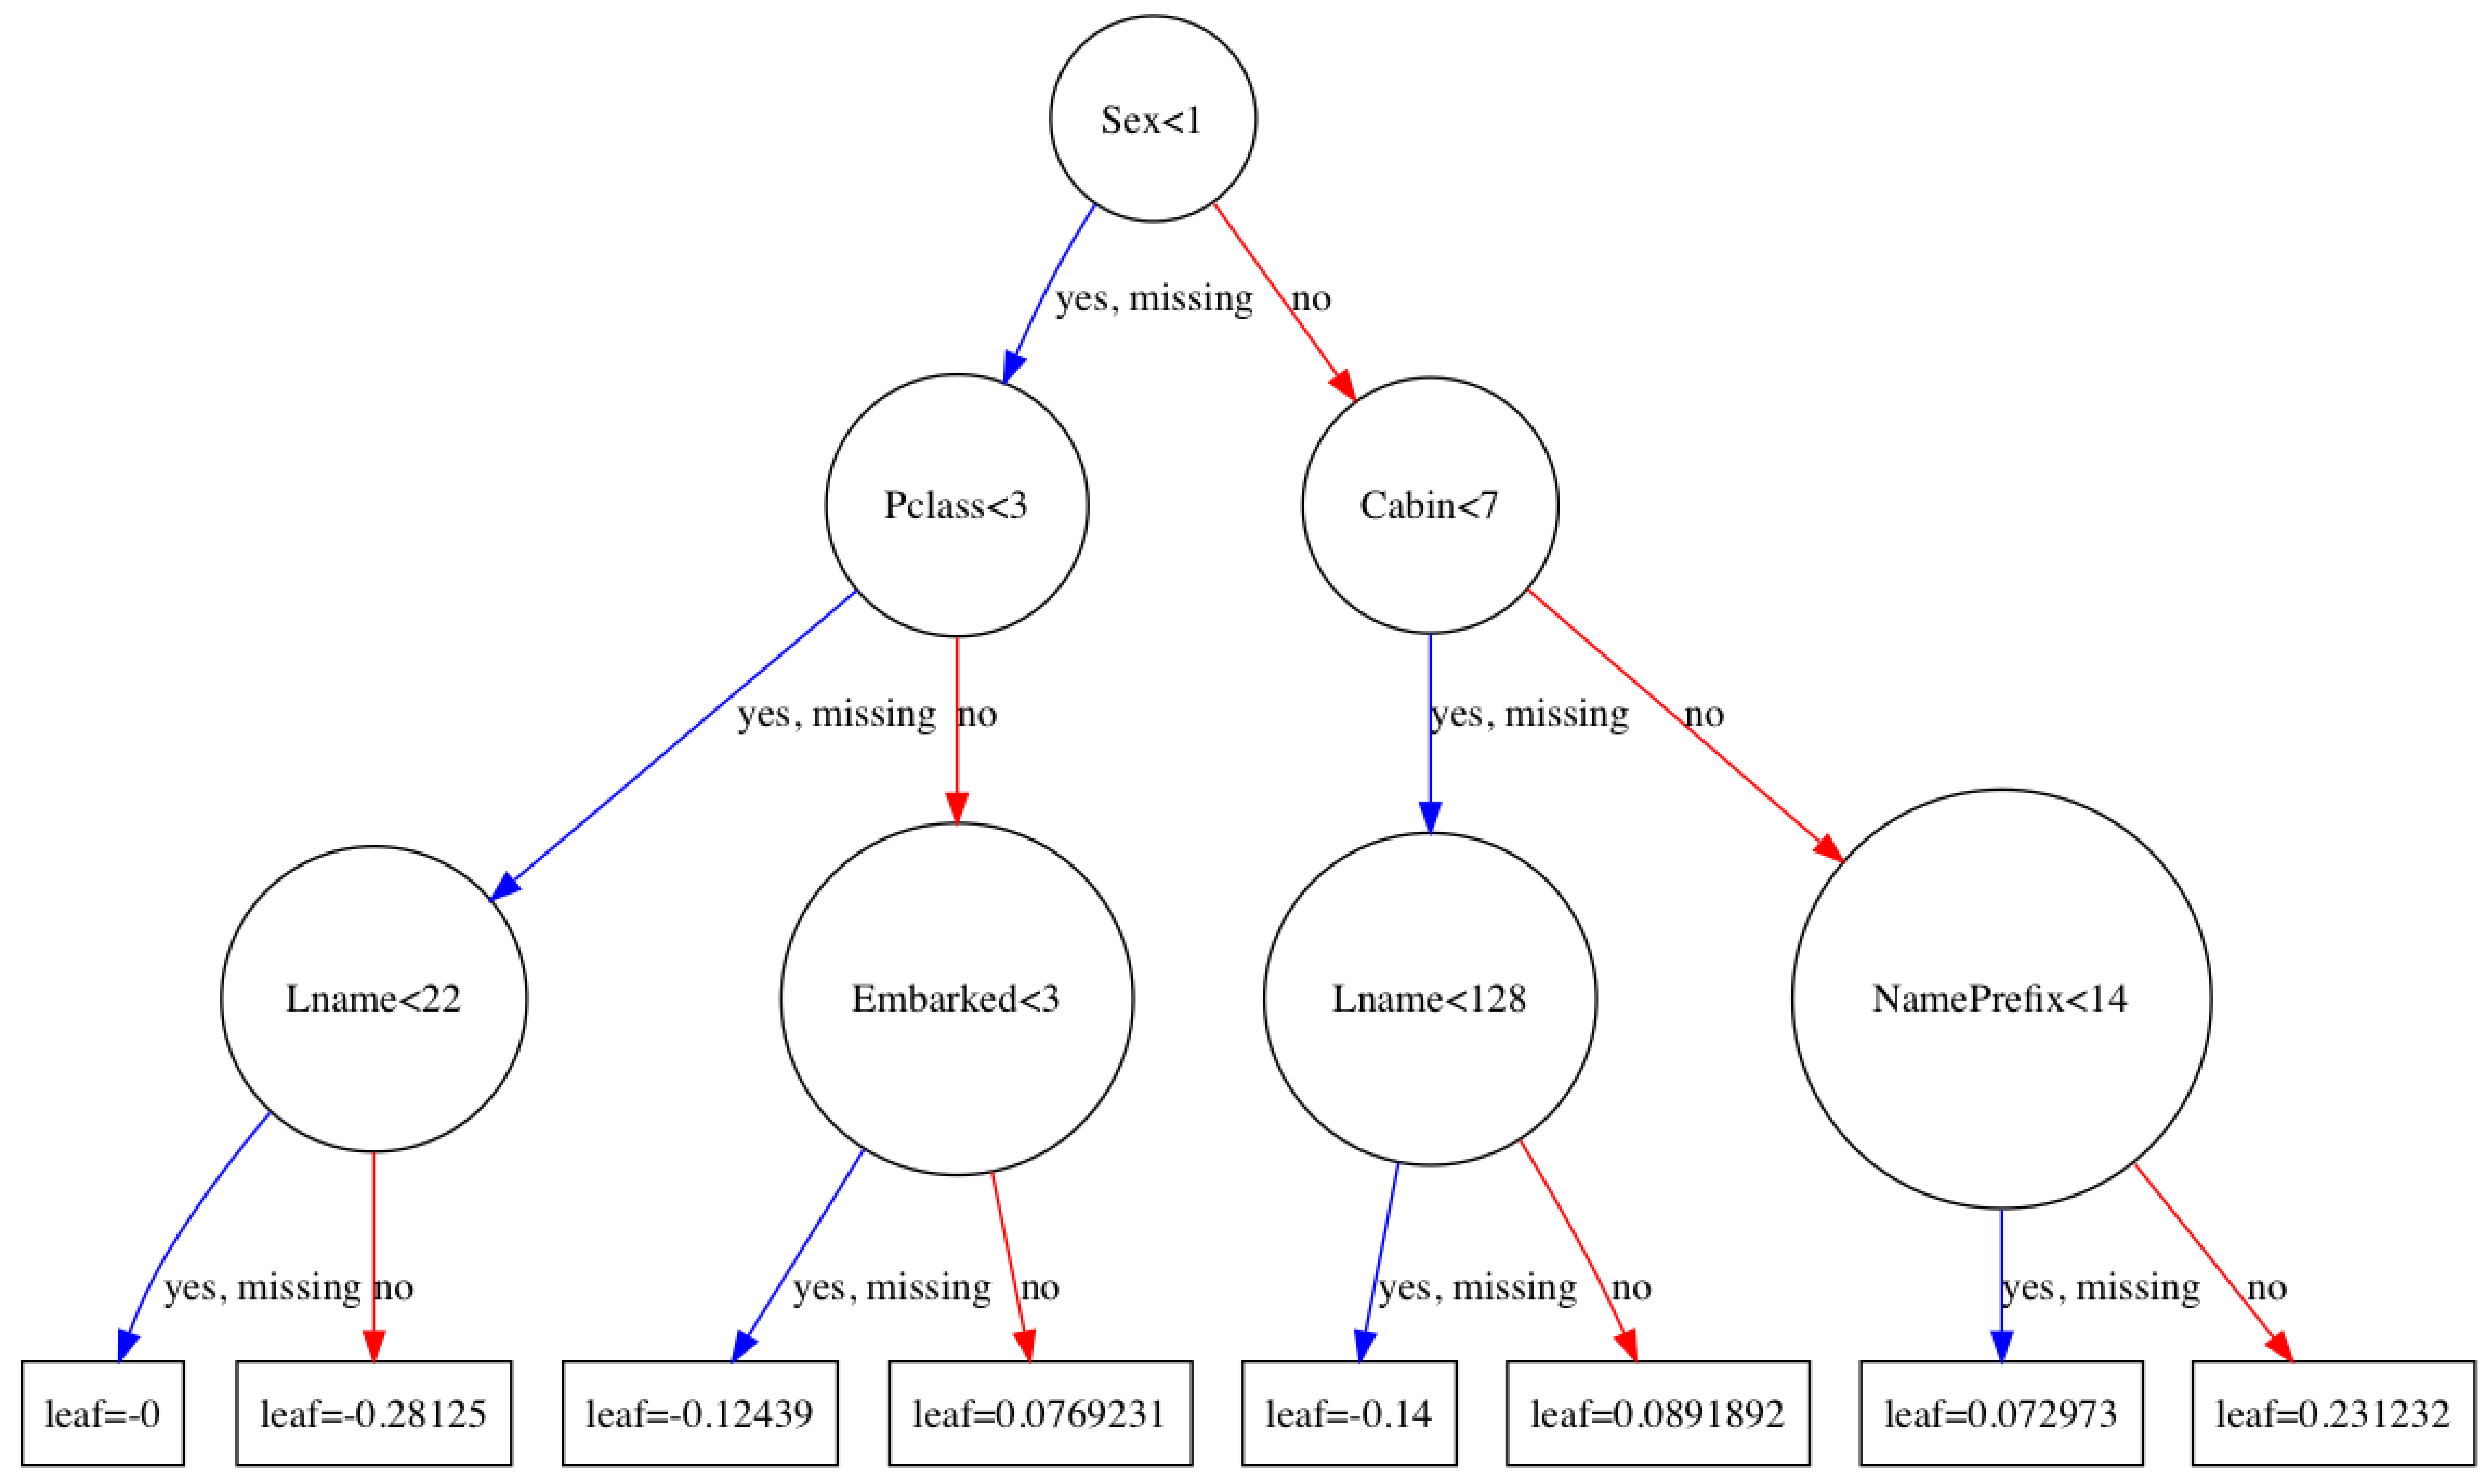

In [87]:
xgb.plot_tree(bst)
fig = pyplot.gcf()
fig.set_size_inches(150, 100)
fig.savefig('tree.png')